In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib_inline

In [3]:
!pip install d2l=="0.17.6"
#!pip uninstall d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6

In [4]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [5]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('png')

In [6]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root = "/content/drive/MyDrive/Colab Notebooks/KUBIG/24_Spring_DL/data", train =True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(
    root = "/content/drive/MyDrive/Colab Notebooks/KUBIG/24_Spring_DL/data", train =False, transform=trans, download=True)

In [7]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [8]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [9]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [10]:
#숫자 형태의 레이블을 텍스트 레이블로 바꿔주는 함수
def get_fashion_mnist_labels(labels):
  """Fashion-MNIST를 위한 텍스트라벨을 리턴"""
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [11]:
# visualize example

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  """이미지 리스트 플롯그리기"""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # Tensor Image
      ax.imshow(img.numpy())
    else:
      # PIL Image
      pass
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes


In [12]:
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 194, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 241, in _build_one_inside_env
    wheel_path = build_wheel_legacy

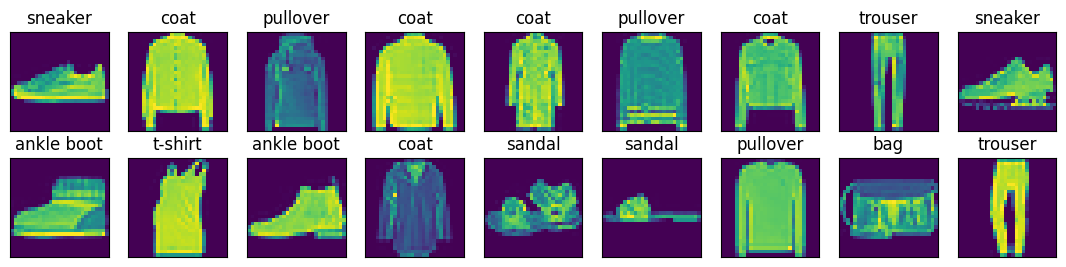

In [13]:
# training dataset 가져오기
X, y = next(iter(data.DataLoader(mnist_train, shuffle = True, batch_size = 18)))
show_images (X.reshape(18, 28, 28), 2, 9, titles = get_fashion_mnist_labels(y));

In [14]:
# 미니 배치 읽기
batch_size = 256

def get_dataloader_workers():
  """Use 4 processes to read the data."""
  return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers = get_dataloader_workers())

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
# training data 읽는 시간 체크

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f}.sec'

'9.81.sec'

In [16]:
# Putting All Things Together

def load_data_fashion_mnist(batch_size, resize=None):
  """Fashion-MNIST dataset 을 다운로드하고 memory로 로드"""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root = "/content/drive/MyDrive/Colab Notebooks/KUBIG/24_Spring_DL/data", train =True, transform=trans, download = True)
  mnist_test = torchvision.datasets.FashionMNIST(
      root = "/content/drive/MyDrive/Colab Notebooks/KUBIG/24_Spring_DL/data", train =True, transform=trans, download = True)
  return(data.DataLoader(mnist_train, batch_size, shuffle=True ,
                         num_workers=get_dataloader_workers()),
         data.DataLoader(mnist_test, batch_size, shuffle=False,
                         num_workers=get_dataloader_workers()))


In [17]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.6 Implementation of Softmax Regression from Scratch

**코드 한 줄 한 줄이 어떤 이유로 쓰였는지 씹어보며 공부해보세요! 😀**

In [18]:
import torch
from IPython import display
from d2l import torch as d2l
import numpy as np

In [19]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100%|██████████| 26421880/26421880 [00:01<00:00, 16519635.56it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 310688.02it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5535943.02it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14569687.58it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [20]:
# image flatten to vectors of length 784.
# 각 pixel 위치를 feature로 봄
# class 가 10개니까 아웃풋 dimension이 10
# Gaussian 노이즈로 W 초기값 설정
# 0으로 b 초기값 설정

num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad=True )
b = torch.zeros(num_outputs, requires_grad = True )

In [21]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0,5.0,6.0]])
X.sum(0, keepdim = True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [22]:
# softmax 함수 구현
## 입력 벡터를 확률값으로 변환하는 함수. 입력 벡터의 각 요소를 지수 함수로 변환 -> 정규화하여 확률 분포로 만듦

def softmax(X):
  X_exp = torch.exp(X)  #입력 벡터를 지수 함수로 변환(양수화)
  partition = torch.sum(X_exp, dim=1, keepdim=True)     #지수 함수로 변환된 값의 합
  return X_exp / partition      #정규화(각 원소를 합으로 나누어 확률 분포를 생성)

In [23]:
#X라는 행렬을 softmax를 적용하여 각 행을 확률로 변환, X_prob에 저장
X = torch.normal(0, 1, (2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0996, 0.1264, 0.0518, 0.5157, 0.2064],
         [0.1053, 0.0681, 0.1403, 0.5822, 0.1040]]),
 tensor([1., 1.]))

In [24]:
#가중치와 편향, 입력 X를 이용해 소프트맥스 함수를 적용한 결과를 반환하는 신경망 모델 정의
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [25]:
y = torch.tensor([0,2]) #실제 레이블
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])    #예측 레이블
y_hat[[0,1], y]   #예측된 확률 분포에서 실제 레이블에 해당하는 확률을 가져옴

tensor([0.1000, 0.5000])

In [26]:
# cross-entropy loss function 구현
##소프트맥스 함수의 출력값인 확률 분포와 실제 레이블 간의 차이 정량화
##로그 함수로 작은 확률 값을 더 강조, 모델이 틀린 경우 더 높게 손실을 계산

def cross_entropy(y_hat, y) :
	return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [27]:
def accuracy(y_hat, y):
  """correct prediction 수를 계산"""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis = 1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

In [28]:
accuracy(y_hat, y) / len(y)

0.5

In [29]:
def evaluate_accuracy(net, data_iter):
    """모델 정확도 계산"""
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [30]:
class Accumulator:
    """n 개 변수 합 축적"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [31]:
evaluate_accuracy(net, test_iter)

0.0742

In [32]:
#모델 훈련 함수 정의

def train_epoch(net, train_iter, loss, updater):
    """training loop"""
    # Set the model to training model
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, number of examples
    metric = Accumulator(3)
    for X, y in train_iter:     #train 셋에서 미니 배치 가져기
        # Compute gradients and update parameters
        y_hat = net(X)          #모델에 X 넣어서 예측 계산
        l = loss(y_hat, y)      #예측과 실제 레이블 간의 loss 계산
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()    #역전파 수행
            updater(X.shape[0])   #파라미터 업데이트
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())   #현재 미니배치의 loss, accuracy, 예제의 총 수 누적
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]   #현재 epoch에서의 평균 loss와 accuracy 반환

In [33]:
class Animator:
    """애니메이션으로 데이터 플롯팅"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


In [34]:
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    """모델 학습"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


In [35]:
lr = 0.1

def updater(batch_size):
  return d2l.sgd([W, b], lr, batch_size)

In [132]:
pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires pandas>=1.3.0, but you have pandas 1.2.4 which is incompatible.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.8.2 which is incompatible.
mizani 0.9.3 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.21.5 which is incompatible

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

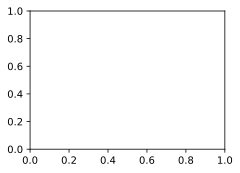

In [133]:
num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

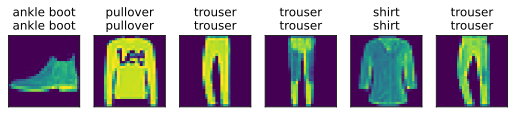

In [134]:
def predict(net, test_iter, n=6):
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis = 1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(
      X[0:n].reshape((n, 28, 28)), 1 , n, titles = titles[0:n])
predict(net, test_iter)

In [38]:
import torch
from torch import nn
from d2l import torch as d2l

In [39]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [40]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [41]:
loss = nn.CrossEntropyLoss(reduction = 'none')

In [42]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)

In [43]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

KeyboardInterrupt: 

ImportError: cannot import name '_check_savefig_extra_args' from 'matplotlib.backend_bases' (/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py)

<Figure size 350x250 with 1 Axes>

## 세션 때 배운 코드를 복습해봐요 😀

**강의자료 보지않고 빈 칸 채워보기!**

# Numpy

### data generation

In [48]:
import numpy as np

true_b = 1
true_w = 2

N = 100

np.random.seed(42)
x = np.random.rand(N,1)  # Uniform
epsilon = (0.1 * np.random.randn(N,1))  # standard normal dist  # noise
y = x * true_w + true_b + epsilon ## 빈칸을 채워주세요. ##

In [54]:
x.shape, y.shape

((100, 1), (100, 1))

### Train-Validation Split

In [49]:
# Shuffles the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

### Gradient Descent for Linear Regression

In [50]:
# 실행시간을 측정해주는 Decorator 입니다.

import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Execution time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [78]:
y_hat = np.random.randn(1) + np.random.randn(1) * x_train
y_hat.shape

(80, 1)

In [124]:
@timer
def train_model_numpy(lr = 0.1, epochs = 1000):
  # Initialize parameters
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train
    error = (y_train - y_hat)
    mse_loss = (error ** 2) ## 빈칸을 채워주세요. ##
    # Gradient computation
    b_grad = -2*error.mean() ## 빈칸을 채워주세요. ## 미분 어떻게 했었죠?ㅎㅎ
    w_grad = -2*(error*x_train).mean() ## 빈칸을 채워주세요. ##
    b = b - lr * b_grad
    w = w - lr * w_grad

  return b, w


In [125]:
b, w = train_model_numpy(lr=0.1, epochs=1000)
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_numpy: 0.028708219528198242 seconds
b_estimate:[1.02341411], w_estimate:[1.93680655]


# Pytorch

### Data Generation

In [127]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# create tensor at CPU:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor ar GPU:
## 빈칸을 채워주세요. ##  # GPU가 현재 연결이 되어있다면 cuda를 콜하겠다. 아니면 cpu 쓰겠다! 하는 코드
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)


### Gradient Descent

In [128]:
@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True)
  w = torch.randn(1, requires_grad=True)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = torch.mean(error**2)
    # Gradient computation and descent
    mse_loss.backward()

    with torch.no_grad():
            b -= lr * b.grad
            w -= lr * w.grad
    b.grad.zero_()
    w.grad.zero_()
  return b, w

In [129]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_torch: 0.2514183521270752 seconds
b_estimate:tensor([1.0234], requires_grad=True), w_estimate:tensor([1.9368], requires_grad=True)


**optimizer 를 사용해서 gradient descent 를 하는 방법도 있어요!**

In [130]:
import torch.optim as optim
import torch.nn as nn

@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr = lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient computation and descent
    loss.backward()
    optimizer.step() # 경사하강법 연산, step 한 번을 밟는다!
    optimizer.zero_grad()
  return b, w

In [131]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_torch: 0.7241942882537842 seconds
b_estimate:tensor([1.0234], requires_grad=True), w_estimate:tensor([1.9368], requires_grad=True)
